In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('Data/Real-Data/Real_Combine.csv')

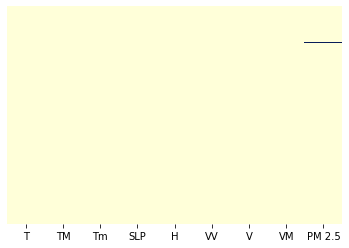

In [198]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu');  #Data Preprocessing-checking for null values

In [3]:
data=data.dropna()

In [4]:
X=data.iloc[:,:-1]  #independent features
y=data.iloc[:,-1]     #dependent feature

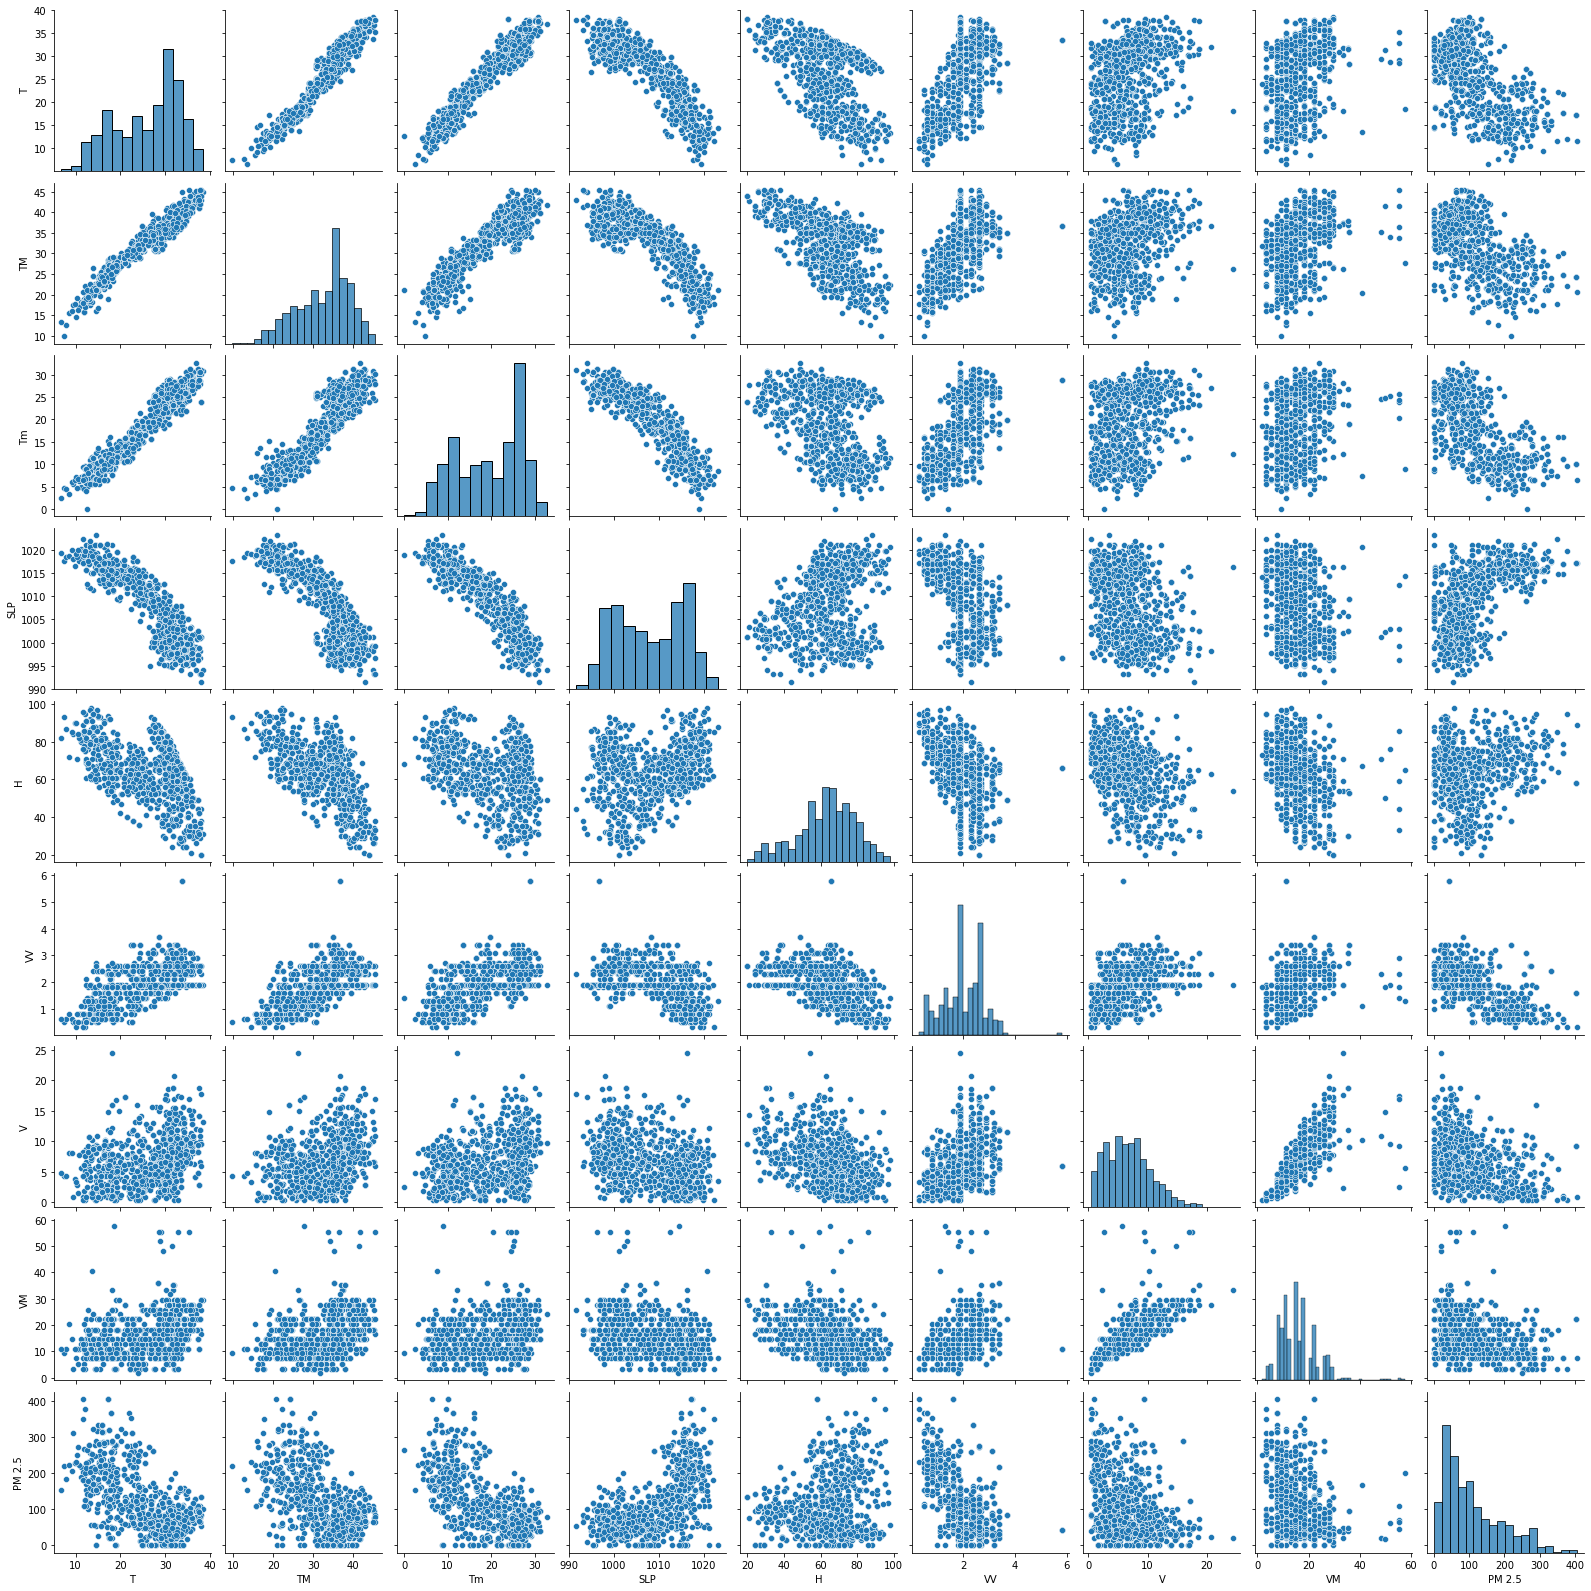

In [201]:
sns.pairplot(data)   #The last row is PM 2.5 vs all other feature, linear regression is not the right choice as it will give a linear best fit line.

In [202]:
corr_matric = data.corr()

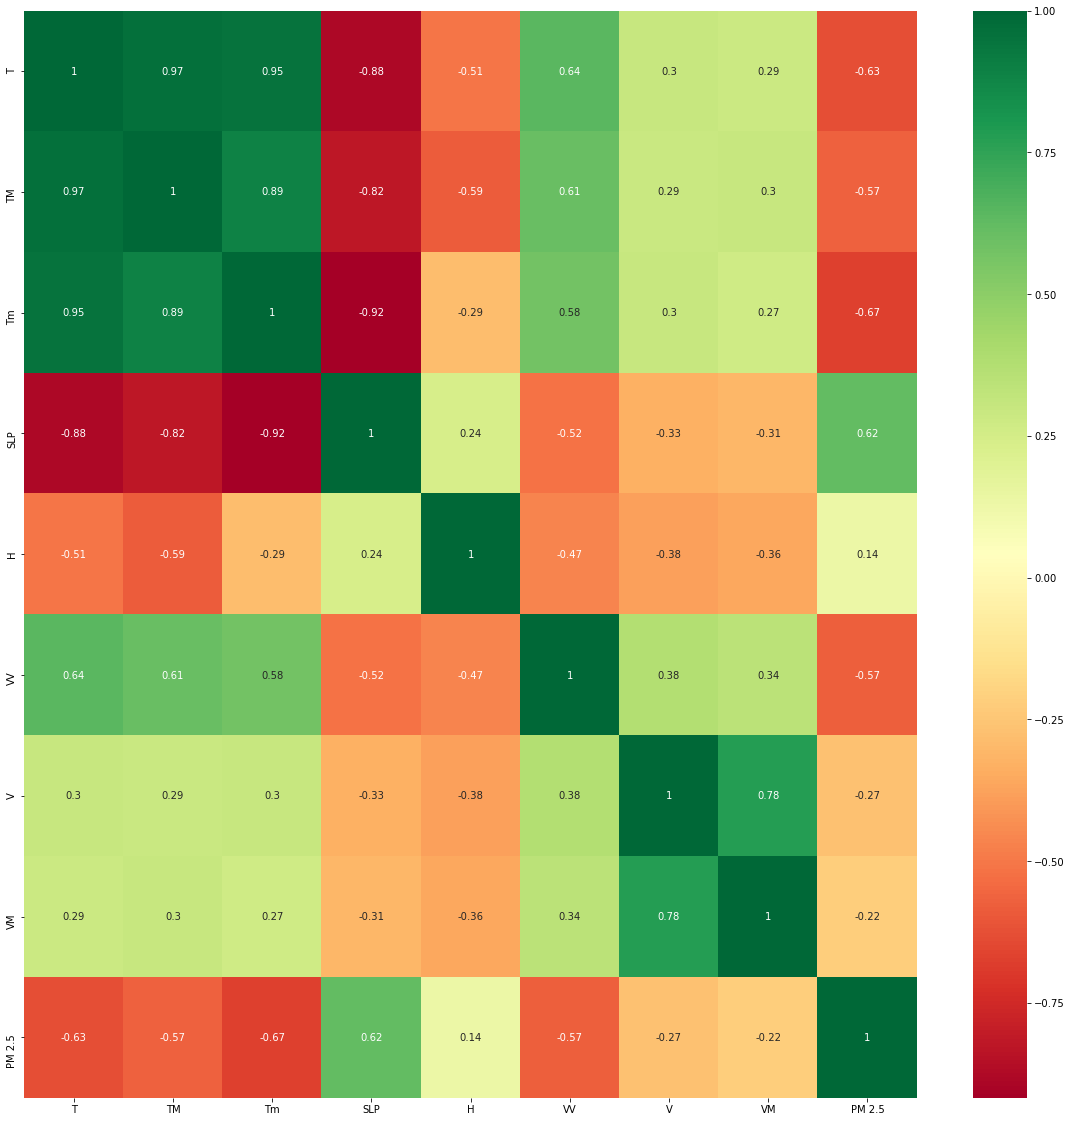

In [203]:
#corr_matric = data.corr()
#top_features = corr_matric.index
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn');

# Feature Importance

In [204]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [205]:
print(model.feature_importances_)  

[0.16586005 0.08182339 0.2117416  0.14008354 0.09006634 0.21440812
 0.05214825 0.04386871]


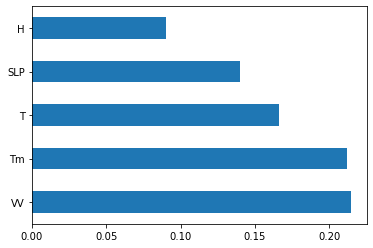

In [206]:
feat_importance = pd.Series(model.feature_importances_,index=X.columns)
feat_importance.nlargest(5).plot(kind='barh')
plt.show();

C:\Users\Shruti\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

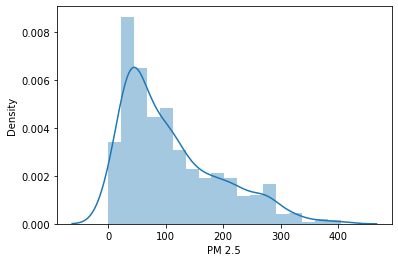

In [207]:
sns.distplot(y)   #right skewed

In [208]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [209]:
from sklearn.linear_model import LinearRegression

In [210]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [211]:
regressor.coef_   #slope w.r.t all independent features

array([ -2.69090829,   0.46219975,  -3.86705184,  -0.04494855,
        -1.21193616, -40.11490762,  -2.53563257,   0.56148181])

In [212]:
regressor.intercept_   #value of y when all independent features are 0

448.11616967588213

In [213]:
regressor.score(X_train,y_train)  #R^2 value should be closer to 1

0.551516808175875

In [214]:
regressor.score(X_test,y_test)   #not a good model

0.48525331308567876

In [215]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(regressor,X,y,cv=5)

In [216]:
score.mean()

0.4710569304807392

# Model Evaluation

In [217]:
coeff_data = pd.DataFrame(regressor.coef_,X.columns,columns=['Coefficient'])
coeff_data

Coefficient
T      -2.690908
TM      0.462200
Tm     -3.867052
SLP    -0.044949
H      -1.211936
VV    -40.114908
V      -2.535633
VM      0.561482

In [218]:
prediction=regressor.predict(X_test)

C:\Users\Shruti\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

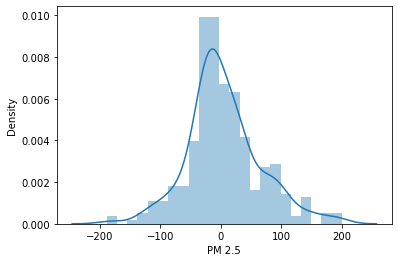

In [219]:
sns.distplot(y_test-prediction)   #almost bell curve hence good

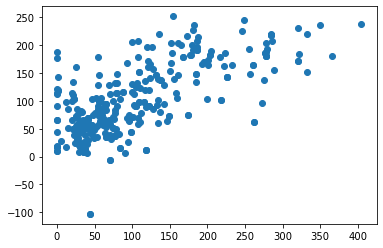

In [220]:
plt.scatter(y_test,prediction)

In [221]:
from sklearn import metrics
print('MAE: ', metrics.mean_absolute_error(y_test,prediction))
print('MSE: ', metrics.mean_squared_error(y_test,prediction))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE:  44.83624126628639
MSE:  3687.5430309324192
RMSE:  60.725143317512384


In [222]:
import pickle
file=open('linear_regression.pkl','wb')
pickle.dump(regressor,file)

# Ridge

In [223]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [224]:
ridge = Ridge()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}   #best alpha chosen using grid search cv
ridge_regressor = GridSearchCV(ridge,parameters,scoring = 'neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [225]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)   #score closer to 0 than linear regression

{'alpha': 40}
-3664.364899607175


# Lasso

In [226]:
from sklearn.linear_model import Lasso

In [227]:
lasso = Lasso()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}   #best alpha chosen using grid search cv
lasso_regressor = GridSearchCV(lasso,parameters,scoring = 'neg_mean_squared_error',cv=5)
lasso_regressor.fit(X,y)

C:\Users\Shruti\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1443875.0678712588, tolerance: 614.559203374646
  model = cd_fast.enet_coordinate_descent(
C:\Users\Shruti\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1568739.9493827724, tolerance: 678.9710639134807
  model = cd_fast.enet_coordinate_descent(
C:\Users\Shruti\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1456481.2270733204, tolerance: 626.8737580831347
  model = cd_fast.enet_coordinate_descent(
C:\Users\Shruti\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergence

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [228]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1}
-3666.78325343702


In [229]:
prediction = lasso_regressor.predict(X_test)

C:\Users\Shruti\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


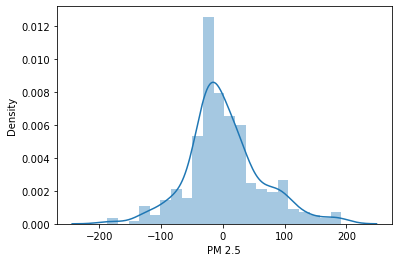

In [230]:
sns.distplot(y_test-prediction);

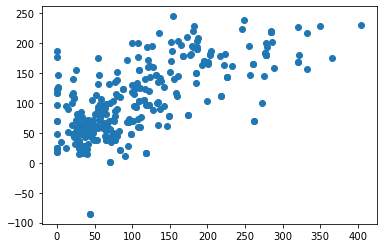

In [231]:
plt.scatter(y_test,prediction)

In [232]:
print('MAE: ', metrics.mean_absolute_error(y_test,prediction))
print('MSE: ', metrics.mean_squared_error(y_test,prediction))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE:  44.50831198875126
MSE:  3627.8109390424697
RMSE:  60.2313119485411


In [233]:
import pickle
file=open('lasso_regression.pkl','wb')
pickle.dump(lasso_regressor,file)

# Decision Tree Regressor

In [234]:
from sklearn.tree import DecisionTreeRegressor

In [235]:
dtree = DecisionTreeRegressor(criterion='mse')

In [236]:
dtree.fit(X_train,y_train)

DecisionTreeRegressor()

In [237]:
print('R^2 score for train dataset is {}'.format(dtree.score(X_train,y_train)))

R^2 score for train dataset is 1.0


In [238]:
print('R^2 score for test dataset is {}'.format(dtree.score(X_test,y_test)))   #overfitting

R^2 score for test dataset is 0.7170898302774688


In [239]:
score = cross_val_score(dtree,X,y,cv=5)

In [240]:
score.mean()

0.4561250292268763

In [241]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus

In [242]:
features = list(data.columns[:-1])    #graphviz takes input as a list
features

['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM']

In [243]:
import os
os.environ['PATH'] = os.environ['PATH'] + ';' +os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

In [244]:
dot_data = StringIO()
export_graphviz(dtree,out_file=dot_data,feature_names=features,filled=True,rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.935051 to fit



In [245]:
prediction = dtree.predict(X_test)

C:\Users\Shruti\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

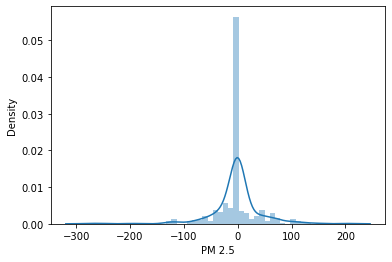

In [246]:
sns.distplot(y_test-prediction)

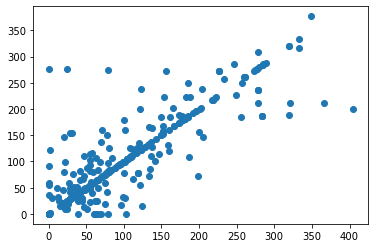

In [247]:
plt.scatter(y_test,prediction)

# HyperParameter Tuning Decision Tree Regressor

In [248]:
params = {
    "splitter":["best","random"],
    "max_depth":[3,4,5,6,8,10,12,15],
    "min_samples_leaf":[1,2,3,4,5],
    "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4],
    "max_features":["auto","log2","sqrt",None],
    "max_leaf_nodes":[None,10,20,30,40,50,60,70]
}

In [249]:
from sklearn.model_selection import GridSearchCV

In [250]:
random_search = GridSearchCV(dtree,param_grid=params,scoring='neg_mean_squared_error',n_jobs=-1,cv=10,verbose=3)

In [251]:
def timer(start_time=None):
    if not start_time:
        start_time=datetime.now()
        return start_time
    elif start_time:
        thour,temp_sec = divmod((datetime.now()-start_time).total_seconds(),3600)
        tmin,tsec=divmod(temp_sec,60)
        print('\n Time Taken: %i hours, %i mins and %i seconds' % (thour,tmin,round(tsec,2)))

In [252]:
from datetime import datetime

In [253]:
start_time = timer(None)
random_search.fit(X,y)
timer(start_time)

Fitting 10 folds for each of 10240 candidates, totalling 102400 fits

 Time Taken: 0 hours, 0 mins and 54 seconds


In [254]:
random_search.best_params_

{'max_depth': 6,
 'max_features': None,
 'max_leaf_nodes': 10,
 'min_samples_leaf': 4,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [255]:
random_search.best_score_

-3131.6489619178874

In [256]:
predictions=random_search.predict(X_test)

C:\Users\Shruti\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

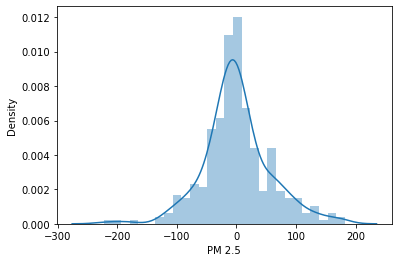

In [257]:
sns.distplot(y_test-predictions)

In [258]:
print('MAE: ', metrics.mean_absolute_error(y_test,prediction))
print('MSE: ', metrics.mean_squared_error(y_test,prediction))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE:  22.768457825203257
MSE:  2026.7122669482558
RMSE:  45.01902116826015


In [259]:
file = open('decision_regression_model.pkl','wb')
pickle.dump(random_search,file)

# Random Forest Regressor

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [6]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train,y_train)

RandomForestRegressor()

In [7]:
print('R^2 score for train dataset is {}'.format(regressor.score(X_train,y_train)))

R^2 score for train dataset is 0.9733788171511863


In [9]:
print('R^2 score for test dataset is {}'.format(regressor.score(X_test,y_test)))

R^2 score for test dataset is 0.7859717887017332


In [10]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(regressor,X,y,cv=5)

In [11]:
score.mean()

0.726459239359691

In [13]:
prediction=regressor.predict(X_test)

C:\Users\Shruti\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

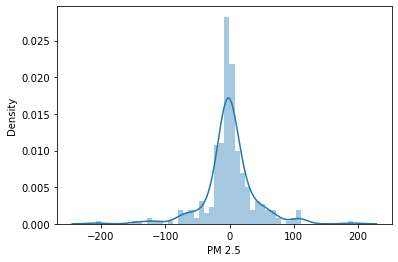

In [14]:
sns.distplot(y_test-prediction)

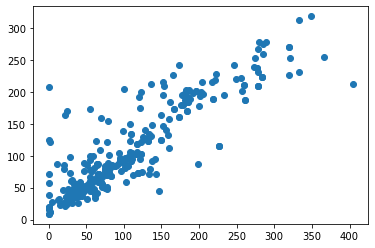

In [15]:
plt.scatter(y_test,prediction)

## Hyperparameter tuning

In [16]:
from sklearn.model_selection import RandomizedSearchCV

In [18]:
n_estimators = [int(x) for x in np.linspace(start=100,stop=1200,num=12)]  #no. of trees in random forest
max_features=['auto','sqrt']  #no. of features to consider at every split
max_depth=[int(x) for x in np.linspace(5,30,num=6)]  #max no. of levels in the tree
min_samples_split=[2,5,10,15,100]  #min no. of samples required to split a node
min_samples_leaf=[1,2,5,10]    #min no. of samples required at each leaf node

In [19]:
random_grid={'n_estimators':n_estimators,'max_features':max_features,'max_depth':max_depth,'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf}

In [20]:
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [21]:
#first create a base model to tune
rf=RandomForestRegressor()

In [22]:
rf_random = RandomizedSearchCV(estimator=rf,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=100,cv=5,verbose=2,random_state=42,n_jobs=1)

In [23]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.3s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_es

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=900; total time=   1.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=900; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features

[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=300; total time=   0.3s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=300; total time=   0.3s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=300; total time=   0.3s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=300; total time=   0.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_featu

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=   0.6s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=   1.6s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=   1.7s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=   1.6s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=   1.6s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=   1.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=15, max_feature

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   0.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   0.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1200; total time=   1.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1200; total time=   1.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1200; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1200; total time=   1.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1200; total time=   1.1s
[CV] END max_depth=10, max_

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=500; total time=   0.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=500; total time=   0.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=500; total time=   0.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=500; total time=   0.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=500; total time=   0.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=600; total time=   0.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=600; total time=   0.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=600; total time=   0.5s
[CV] END max_depth=30,

[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   0.4s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   0.4s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   2.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   2.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   2.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   2.1s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   2.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_fe

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=1100; total time=   0.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=1100; total time=   0.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=1100; total time=   0.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=1100; total time=   0.9s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.5s
[CV] END max_depth=10, m

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [24]:
rf_random.best_params_

{'n_estimators': 500,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 15}

In [25]:
rf_random.best_score_

-1554.2895243742585

In [26]:
predictions = rf_random.predict(X_test)

C:\Users\Shruti\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

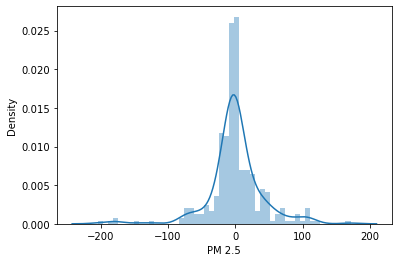

In [27]:
sns.distplot(y_test-predictions)

In [29]:
from sklearn import metrics
print('MAE: ', metrics.mean_absolute_error(y_test,prediction))
print('MSE: ', metrics.mean_squared_error(y_test,prediction))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE:  24.02167276422764
MSE:  1533.2555974803627
RMSE:  39.156807805033885


In [30]:
import pickle
file=open('random_forest_regression_model.pkl','wb')
pickle.dump(rf_random,file)

# XgBoost Regressor

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [6]:
import xgboost as xgb

In [7]:
regressor = xgb.XGBRegressor()
regressor.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [8]:
print('R^2 score for train dataset is {}'.format(regressor.score(X_train,y_train)))

R^2 score for train dataset is 0.9997717196345083


In [9]:
print('R^2 score for test dataset is {}'.format(regressor.score(X_test,y_test)))

R^2 score for test dataset is 0.8123312908288712


In [10]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(regressor,X,y,cv=5)

In [11]:
score.mean()

0.7251276747945072

In [12]:
prediction = regressor.predict(X_test)

C:\Users\Shruti\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

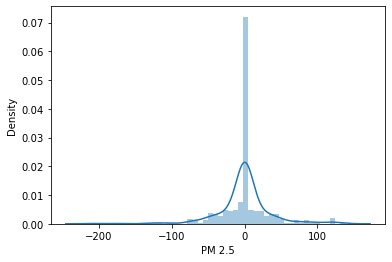

In [13]:
sns.distplot(y_test-prediction)

## Hyperparameter Tuning

In [14]:
from sklearn.model_selection import RandomizedSearchCV

In [15]:
n_estimators = [int(x) for x in np.linspace(start=100,stop=1200,num=12)]  #no. of trees in random forest
learning_rate =['0.05','0.1','0.2','0.3','0.5','0.6']
max_depth=[int(x) for x in np.linspace(5,30,num=6)]  #max no. of levels in the tree
subsample=[0.7,0.6,0.8]
min_child_weight=[3,4,5,6,7]

In [16]:
xg_grid = {'n_estimators':n_estimators,'learning_rate':learning_rate,'max_depth':max_depth,'subsample':subsample,'min_child_weight':min_child_weight}

In [17]:
print(xg_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'learning_rate': ['0.05', '0.1', '0.2', '0.3', '0.5', '0.6'], 'max_depth': [5, 10, 15, 20, 25, 30], 'subsample': [0.7, 0.6, 0.8], 'min_child_weight': [3, 4, 5, 6, 7]}


In [18]:
regressor= xgb.XGBRegressor()

In [19]:
xg_random=RandomizedSearchCV(estimator=regressor,param_distributions=xg_grid,scoring='neg_mean_squared_error',n_iter=100,cv=5,verbose=2,random_state=42,n_jobs=1)

In [20]:
xg_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   0.9s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   1.1s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   1.0s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   1.3s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   0.9s
[CV] END learning_rate=0.3, max_depth=20, min_child_weight=6, n_estimators=600, subsample=0.7; total time=   1.0s
[CV] END learning_rate=0.3, max_depth=20, min_child_weight=6, n_estimators=600, subsample=0.7; total time=   0.8s
[CV] END learning_rate=0.3, max_depth=20, min_child_weight=6, n_estimators=600, subsample=0.7; total time=   0.7s
[CV] END learning_ra

[CV] END learning_rate=0.5, max_depth=30, min_child_weight=7, n_estimators=1100, subsample=0.7; total time=   0.8s
[CV] END learning_rate=0.5, max_depth=30, min_child_weight=7, n_estimators=1100, subsample=0.7; total time=   1.0s
[CV] END learning_rate=0.5, max_depth=30, min_child_weight=7, n_estimators=1100, subsample=0.7; total time=   0.7s
[CV] END learning_rate=0.3, max_depth=25, min_child_weight=5, n_estimators=800, subsample=0.6; total time=   0.8s
[CV] END learning_rate=0.3, max_depth=25, min_child_weight=5, n_estimators=800, subsample=0.6; total time=   0.8s
[CV] END learning_rate=0.3, max_depth=25, min_child_weight=5, n_estimators=800, subsample=0.6; total time=   0.9s
[CV] END learning_rate=0.3, max_depth=25, min_child_weight=5, n_estimators=800, subsample=0.6; total time=   0.9s
[CV] END learning_rate=0.3, max_depth=25, min_child_weight=5, n_estimators=800, subsample=0.6; total time=   0.8s
[CV] END learning_rate=0.1, max_depth=15, min_child_weight=7, n_estimators=600, subsa

[CV] END learning_rate=0.1, max_depth=5, min_child_weight=4, n_estimators=1200, subsample=0.7; total time=   0.7s
[CV] END learning_rate=0.5, max_depth=20, min_child_weight=6, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=20, min_child_weight=6, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=20, min_child_weight=6, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=20, min_child_weight=6, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=20, min_child_weight=6, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.6, max_depth=25, min_child_weight=7, n_estimators=800, subsample=0.7; total time=   0.4s
[CV] END learning_rate=0.6, max_depth=25, min_child_weight=7, n_estimators=800, subsample=0.7; total time=   0.5s
[CV] END learning_rate=0.6, max_depth=25, min_child_weight=7, n_estimators=800, subsampl

[CV] END learning_rate=0.05, max_depth=30, min_child_weight=3, n_estimators=1100, subsample=0.8; total time=   2.0s
[CV] END learning_rate=0.05, max_depth=30, min_child_weight=3, n_estimators=1100, subsample=0.8; total time=   2.0s
[CV] END learning_rate=0.05, max_depth=30, min_child_weight=3, n_estimators=1100, subsample=0.8; total time=   2.1s
[CV] END learning_rate=0.05, max_depth=30, min_child_weight=3, n_estimators=1100, subsample=0.8; total time=   2.0s
[CV] END learning_rate=0.2, max_depth=30, min_child_weight=5, n_estimators=1200, subsample=0.6; total time=   1.3s
[CV] END learning_rate=0.2, max_depth=30, min_child_weight=5, n_estimators=1200, subsample=0.6; total time=   1.1s
[CV] END learning_rate=0.2, max_depth=30, min_child_weight=5, n_estimators=1200, subsample=0.6; total time=   1.2s
[CV] END learning_rate=0.2, max_depth=30, min_child_weight=5, n_estimators=1200, subsample=0.6; total time=   1.5s
[CV] END learning_rate=0.2, max_depth=30, min_child_weight=5, n_estimators=1

[CV] END learning_rate=0.3, max_depth=10, min_child_weight=7, n_estimators=800, subsample=0.7; total time=   0.7s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=7, n_estimators=800, subsample=0.7; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=15, min_child_weight=6, n_estimators=300, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=15, min_child_weight=6, n_estimators=300, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=15, min_child_weight=6, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=15, min_child_weight=6, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=15, min_child_weight=6, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=20, min_child_weight=5, n_estimators=300, subsample=0.7; total time=   0.4s
[CV] END learning_rate=0.3, max_depth=20, min_child_weight=5, n_estimators=300, sub

[CV] END learning_rate=0.5, max_depth=25, min_child_weight=3, n_estimators=400, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=25, min_child_weight=3, n_estimators=400, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=25, min_child_weight=3, n_estimators=400, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=25, min_child_weight=3, n_estimators=400, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=25, min_child_weight=3, n_estimators=400, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=30, min_child_weight=3, n_estimators=900, subsample=0.7; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=30, min_child_weight=3, n_estimators=900, subsample=0.7; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=30, min_child_weight=3, n_estimators=900, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=30, min_child_weight=3, n_estimators=900, subsampl

[CV] END learning_rate=0.3, max_depth=5, min_child_weight=4, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_child_weight=4, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_child_weight=4, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=20, min_child_weight=3, n_estimators=800, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=20, min_child_weight=3, n_estimators=800, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=20, min_child_weight=3, n_estimators=800, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=20, min_child_weight=3, n_estimators=800, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=20, min_child_weight=3, n_estimators=800, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=5, min_child_weight=6, n_estimators=900, subsample=0.

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          validate_parameters=None,
                                          verbosity=None),
                   n_iter=100, n_jobs=1,
                   par

In [21]:
xg_random.best_params_

{'subsample': 0.8,
 'n_estimators': 1100,
 'min_child_weight': 3,
 'max_depth': 30,
 'learning_rate': '0.05'}

In [23]:
xg_random.best_score_

-1380.5446346152435

In [24]:
prediction = xg_random.predict(X_test)

C:\Users\Shruti\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

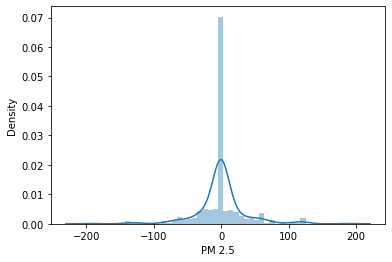

In [25]:
sns.distplot(y_test-prediction)

In [26]:
from sklearn import metrics
print('MAE: ', metrics.mean_absolute_error(y_test,prediction))
print('MSE: ', metrics.mean_squared_error(y_test,prediction))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE:  19.02743722623126
MSE:  1355.7081047805843
RMSE:  36.81994167269395


In [27]:
import pickle
file = open('xgboost_regressor.pkl','wb')
pickle.dump(xg_random,file)

# ANN

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [10]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [14]:
NN_model = Sequential()

#input layer
NN_model.add(Dense(128,kernel_initializer='normal',input_dim=X_train.shape[1]))

#hidden layers
NN_model.add(Dense(256,kernel_initializer='normal',activation='relu'))  #normal works well with relu
NN_model.add(Dense(256,kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256,kernel_initializer='normal',activation='relu'))

#output layer
NN_model.add(Dense(1,kernel_initializer='normal',activation='linear'))  #as it is a linear regression problem

#compile the network
NN_model.compile(loss='mean_absolute_error',optimizer='adam',metrics=['mean_absolute_error'])
NN_model.summary()

#fitting the ANN to the training set
model_history=NN_model.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=100)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 128)               1152      
_________________________________________________________________
dense_16 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_17 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_18 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 257       
Total params: 166,017
Trainable params: 166,017
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
52/52 [==============================] - 1s 10ms/step - loss: 71.3893 - mean_absolute_error: 71.3893 -

Epoch 44/100
52/52 [==============================] - 0s 3ms/step - loss: 41.1259 - mean_absolute_error: 41.1259 - val_loss: 46.9603 - val_mean_absolute_error: 46.9603
Epoch 45/100
52/52 [==============================] - 0s 3ms/step - loss: 39.9810 - mean_absolute_error: 39.9810 - val_loss: 44.3086 - val_mean_absolute_error: 44.3086
Epoch 46/100
52/52 [==============================] - 0s 4ms/step - loss: 41.8437 - mean_absolute_error: 41.8437 - val_loss: 45.0852 - val_mean_absolute_error: 45.0852
Epoch 47/100
52/52 [==============================] - 0s 4ms/step - loss: 41.4105 - mean_absolute_error: 41.4105 - val_loss: 47.4214 - val_mean_absolute_error: 47.4214
Epoch 48/100
52/52 [==============================] - 0s 3ms/step - loss: 42.4233 - mean_absolute_error: 42.4233 - val_loss: 43.7858 - val_mean_absolute_error: 43.7858
Epoch 49/100
52/52 [==============================] - 0s 3ms/step - loss: 40.7913 - mean_absolute_error: 40.7913 - val_loss: 45.0480 - val_mean_absolute_error: 

Epoch 93/100
52/52 [==============================] - 0s 3ms/step - loss: 40.0044 - mean_absolute_error: 40.0044 - val_loss: 44.3129 - val_mean_absolute_error: 44.3129
Epoch 94/100
52/52 [==============================] - 0s 3ms/step - loss: 39.6788 - mean_absolute_error: 39.6788 - val_loss: 43.1655 - val_mean_absolute_error: 43.1655
Epoch 95/100
52/52 [==============================] - 0s 3ms/step - loss: 39.8946 - mean_absolute_error: 39.8946 - val_loss: 47.3795 - val_mean_absolute_error: 47.3795
Epoch 96/100
52/52 [==============================] - 0s 2ms/step - loss: 38.6175 - mean_absolute_error: 38.6175 - val_loss: 43.3656 - val_mean_absolute_error: 43.3656
Epoch 97/100
52/52 [==============================] - 0s 2ms/step - loss: 40.2167 - mean_absolute_error: 40.2167 - val_loss: 42.8493 - val_mean_absolute_error: 42.8493
Epoch 98/100
52/52 [==============================] - 0s 3ms/step - loss: 39.3408 - mean_absolute_error: 39.3408 - val_loss: 42.6901 - val_mean_absolute_error: 

In [15]:
prediction = NN_model.predict(X_test)

C:\Users\Shruti\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

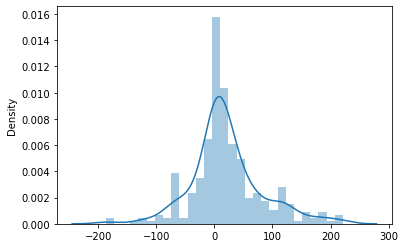

In [17]:
sns.distplot(y_test.values.reshape(-1,1)-prediction) 

In [18]:
from sklearn import metrics
print('MAE: ', metrics.mean_absolute_error(y_test,prediction))
print('MSE: ', metrics.mean_squared_error(y_test,prediction))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE:  43.920447612390284
MSE:  4176.387167746551
RMSE:  64.62497325141845


# KNN

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [6]:
from sklearn.neighbors import KNeighborsRegressor

In [7]:
regressor = KNeighborsRegressor(n_neighbors=1)  #taking by default 1
regressor.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=1)

In [8]:
print('R^2 score for train dataset is {}'.format(regressor.score(X_train,y_train)))

R^2 score for train dataset is 1.0


In [9]:
print('R^2 score for test dataset is {}'.format(regressor.score(X_test,y_test)))

R^2 score for test dataset is 0.5417545333477789


In [10]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(regressor,X,y,cv=5)

In [11]:
score.mean()

0.39387489016756577

In [12]:
prediction = regressor.predict(X_test)

<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

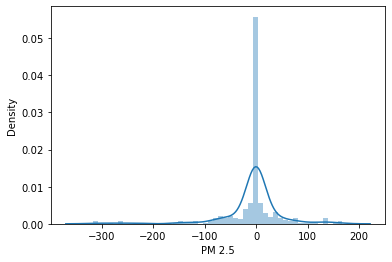

In [14]:
sns.distplot(y_test-prediction)

## Hyperparameter Tuning

In [16]:
accuracy_rate=[]
for i in range(1,40):
    kNN = KNeighborsRegressor(n_neighbors=i)
    score = cross_val_score(kNN,X,y,cv=5,scoring='neg_mean_squared_error')
    accuracy_rate.append(score.mean())

Text(0, 0.5, 'Accuracy Rate')

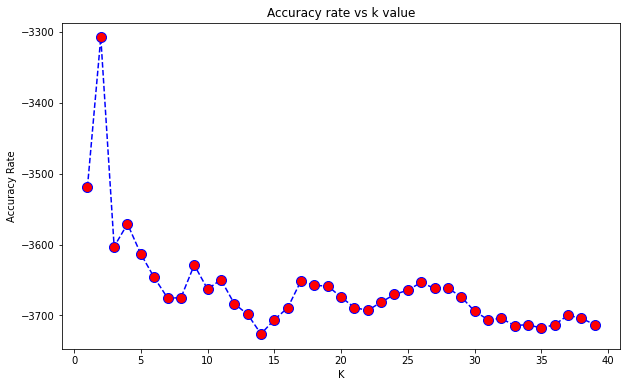

In [17]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Accuracy rate vs k value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

In [18]:
knn = KNeighborsRegressor(n_neighbors=2)  
knn.fit(X_train,y_train)
predictions=knn.predict(X_test)

C:\Users\Shruti\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

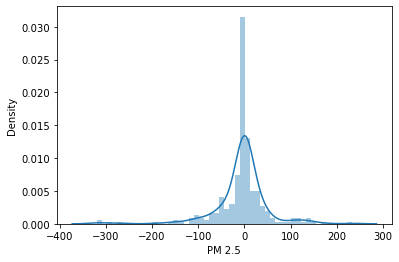

In [20]:
sns.distplot(y_test-predictions)

In [21]:
from sklearn import metrics
print('MAE: ', metrics.mean_absolute_error(y_test,predictions))
print('MSE: ', metrics.mean_squared_error(y_test,predictions))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE:  30.499942835365857
MSE:  3269.0729583624457
RMSE:  57.17580745702194


In [22]:
import pickle
file=open('knn_regressor.pkl','wb')
pickle.dump(knn,file)